# Deplacement des individus

In [16]:
#  grille(n) i.e une fonction qui définira une grille qui representera une population donnee
def grille(n):     #  n:taille de la grille
    a=np.zeros((n,n),dtype=int) # 0 i.e personnes saines
    k=1   # (k=1 et r=1) i.e les indices de la personne infectee qui est l'origine de la propagation de la grippe
    r=1
    for i in range(n):
        if i==k:
            for j in range(n):
                if j==r:#ani.save('varicelle10.html', writer="html")
                    a[i,j]=1     # a[i,j]=1 i.e la personne est infectee
    return a

In [17]:
import numpy as np
import random as rd
n=5
M=grille(n)
p=0.5         #probabilité qui gère le déplacement
p1=0.5        #probabilité de récuperation 
p_infect=1    #probabilité de transmission 
d={(1,1):1}   # dictionnaire qui gère l'incubation
temps_incubation=2
import random
import numpy

In [18]:
def grille_case_vide(n,M):
    #cette fonction sert à définir une grille avec des cases vides pour qu un individu puisse se deplacer
    N=grille(n)
    for i in range(n):
        if( i%2==0 ): #i.e choix des cases vides
            for j in range(n):
                if(j%2==0):
                    N[i,j]=5   # 5 signifie case vide 
    return N
                    

In [19]:
#cette fonction effectue le déplacement de l'individu aux indices x et y vers une case vide
#l'individu se deplacera vers une case vide qui est choisie aleatoirement  parmi un certains nombre de cases vides presentes sur la grille et qui sont enregistrees dans un dictionnaire d 

def deplacement(N,x,y,p):  
    d=[]  #enregistre toutes les cases vides #ani.save('varicelle10.html', writer="html")
    
    if(N[x,y]!= 5):
         if numpy.random.random() <= p: # p: c'est une probabilité qui détermine si l'individu veut se deplacer ou pas 
            for i in range(n):
        
                for j in range(n):
                    if (N[(i,j)]==5):
                        if not (i,j) in d:
                            d.append((i,j))
            (k,l)=random.choice(d)
            
            N[k,l]=N[x,y]
            N[x,y]=5    
    
    return N
        

In [20]:
def next_step_deplacement(N): #i.e  pour chaque individu on effectuera un deplacement 
    for i in range(n):
        for j in range(n):
             deplacement(N,i,j,p)
             
    
    return N   # une nouvelle grille après le deplacement des individus
            

In [26]:
def etat_incubation_deplacement(resultat, p1, p_infect, x, y, temps_incubation, dictio):
    # c'est une fonction qui determinera l'état d'un individu aux indices x et y en fonction de ces 8 voisins
    # dictio : un dictionnaire qui enregistre les personnes infectees et prennent comme valeur nb de jour depuis quand ils etaient infectees
    
    L=[(1,0),(-1,0),(0,1),(0,-1),(1,-1),(1,1),(-1,1),(-1,-1)] #i.e une liste qui permet d'avoir les indices des 8 voisins 
    voisin_infecte=0
    
    
                
    if resultat[x,y] ==2 :      # i.e personne rétablie
        resultat[x,y]=2 # i.e reste rétablie
    
    elif resultat[x,y] ==3:     #i.e personne décédée
        resultat[x,y] =3  #i.e reste décédée
        
    
    elif resultat[x,y]==5:      #i.e cases vides
        resultat[x,y]=5  # i.e reste vide 
        
    elif resultat[x,y]==0:    # i.e personne saine
        
        for (dx, dy) in L: #i.e pour chaque voisin
            
            if x+dx<n and x+dx>=0 and y+dy<n and y+dy>=0: # gestion des bords
                if resultat[x+dx,y+dy]==1 :  # i.e voisin infecte                                         
                        voisin_infecte=voisin_infecte+1
                        
    # gerer l'infection de la personne.
    if voisin_infecte>0:
        if numpy.random.random() <= p_infect:  #i.e p_infect:probabilite d'infecter un individu sain
            resultat[x,y]=1
    
    #gerer l'incubation de la personne.
    
    if resultat[x,y]==1:  #i.e infectee
    # Incrémente le compteur de tous les malades :dictio=dict()
        if (x,y) in dictio :
            dictio[(x,y)]=dictio[(x,y)]+1   # On entre en incubation 
    
    
        else:
            # Nouvel infecté : on le rajoute au dictionnaire
            dictio[(x,y)]=1   
  
    # En incubation depuis "temps_incubation" tours : on devient soit rétabli soit décédé selon une propabilité  p1
    if (x,y) in dictio and dictio[(x,y)] >= temps_incubation:
        if numpy.random.random() <= p1:
            resultat[x,y]=3  #decede
        else:
            resultat[x,y]=2  #retabli
        
        dictio.pop((x,y))
            
    
    return resultat,dictio

In [27]:
def next_step_incubation_deplacement(resultat,d):   #resultat i.e matrice   #d: i.e un dictionnaire qui enregistre les les individus infectes comme cles et ils prennent comme valeur depuis combien de jours ils étaient infectes
    #cette fonction determine l'etat de chaque individu de la grille en appelant la fonction precedente etat_incubation_deplacement
    for i in range(n):  
        
        for j in range(n):
            
            resultat,d =etat_incubation_deplacement(resultat,p1,p_infect,i,j,temps_incubation,d)
    
    return resultat

In [28]:
def simulation(max_itere=10):
   
    cpt=0
    M=grille(n)
    N=grille_case_vide(n,M) # grille avec des cases vides pour que les personnes puissent se deplacer
    result= next_step_deplacement(N) # une grille où les personnes se sont deplacer 
    d={(1,1):1}   #un dictionnaire qui enregistre les personnes infectees et prennent comme valeurle nb de jours  depuis quand ils etaient infectees
    resultat=[]
    resultat.append((N).copy())
    resultat.append((result).copy())
    new_state=next_step_incubation_deplacement(result,d)
    while(cpt<max_itere):
        resultat.append((new_state).copy())
        new_state= next_step_incubation_deplacement(new_state,d)
        cpt = cpt+1
        
    return resultat

[array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]), array([[5, 1, 5, ..., 0, 5, 0],
       [1, 2, 1, ..., 1, 1, 1],
       [5, 1, 5, ..., 1, 5, 1],
       ..., 
       [1, 1, 1, ..., 1, 1, 1],
       [5, 1, 5, ..., 1, 5, 1],
       [1, 1, 1, ..., 1, 1, 1]]), array([[5, 3, 5, ..., 1, 5, 1],
       [2, 2, 3, ..., 2, 3, 3],
       [5, 2, 5, ..., 2, 5, 2],
       ..., 
       [3, 2, 2, ..., 3, 3, 2],
       [5, 3, 5, ..., 2, 5, 2],
       [2, 2, 2, ..., 3, 3, 3]]), array([[5, 3, 5, ..., 3, 5, 3],
       [2, 2, 3, ..., 2, 3, 3],
       [5, 2, 5, ..., 2, 5, 2],
       ..., 
       [3, 2, 2, ..., 3, 3, 2],
       [5, 3, 5, ..., 2, 5, 2],
       [2, 2, 2, ..., 3, 3, 3]]), array([[5, 3, 5, ..., 3, 5, 3],
       [2, 2, 3, ..., 2, 3, 3],
       [5, 2, 5, ..., 2, 5, 2],
       ..., 
       [3, 2, 2, ..., 3, 3, 2],
       [5, 3, 5, ..., 2, 5, 2]

<IPython.core.display.Javascript object>


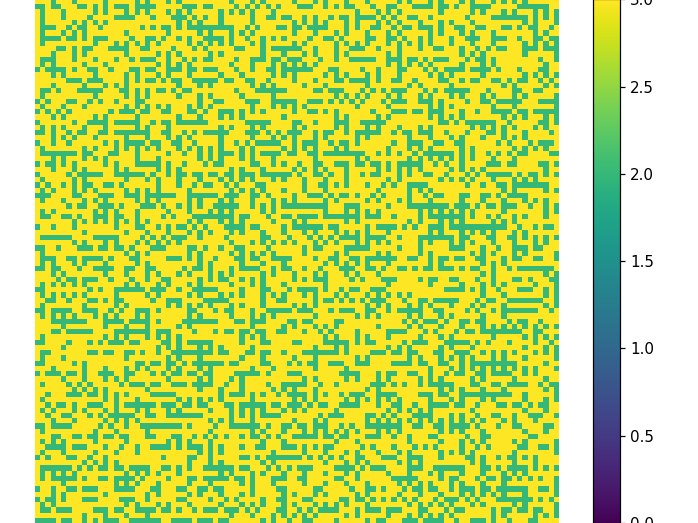

In [32]:
%matplotlib notebook
from pylab import *
import numpy as np
import random

n=100
x=0
y=0


def simulation(max_itere=10):
    cpt=0  
    M=grille(n)
    N=grille_case_vide(n,M)
    D=dict()
    D={(1,1):1}
    resultat=[]
    resultat.append((M).copy())
    new_state=next_step_incubation_deplacement(N,D)
    
    while (cpt < max_itere):
        resultat.append(new_state.copy())
        new_state= next_step_incubation_deplacement(new_state,D)
        cpt = cpt+1
    
    return resultat

resultat_final = simulation(max_itere=10)

print(resultat_final)


import matplotlib.pyplot as plt
size = np.array(M.shape)
dpi = 10.0 
figsize= size[1]/float(dpi),size[0]/float(dpi)
#fig = plt.figure(figsize = figsize, dpi = dpi, facecolor = "white")
fig = plt.figure(facecolor = "white")
fig.add_axes([0.0, 0.0, 1.0, 1.0], frameon = False)
im=plt.imshow(M, interpolation = 'nearest', cmap ="viridis", vmin=0, vmax=3)
plt.xticks([]), plt.yticks([])
plt.colorbar()


import matplotlib.animation as animation

def update(i):
    #simulation_4param(max_itere=10)
    M = resultat_final[i]
    im.set_array(M)
    return im,

ani = animation.FuncAnimation(fig, update, frames=len(resultat_final), interval=500)
ani.save('grippe_espagnole.html', writer="html")
plt.show()


# La partie graphique:

In [33]:
# on a introduit cette fonction pour calculer le nombre de personnes infectees, saines , retablies et mortes
def next_step_incubation_deplacement_nb(resultat,d,nb_infect,nb_sain,nb_retabli,nb_mort,Dict):
    
     #Dict est un dictionaire qui enregistre les personnes deja comptées
    for i in range(n):
        for j in range(n):
            resultat, d = etat_incubation_deplacement(resultat, p1, p_infect, i, j, temps_incubation, d)
            if resultat[i,j]==1:
                if not (i,j) in  Dict:   #la personne n'est pas comptée 
                    nb_infect+=1         #on incremente le nombre de personnes infectées
                    Dict[(i,j)]=1   #on ajoute les indices de la personne aux dictionnaire
                    #pour eviter de compter la personne plusieurs fois 
                else:                   # la personne est dans le dictionaire
                    if resultat[i,j]!= Dict[(i,j)]: # la personne a un nouveau etat donc on doit l'incrementer 
                        nb_infect+=1
                        Dict[(i,j)]=1   #on initialise la valeur du dictionnaire 
                            
            elif resultat[i,j]==0:
                nb_sain+=1
                if not (i,j) in  Dict:         #la personne n'est pas comptée 
                                     #on incremente le nombre de personnes saines
                    Dict[(i,j)]=0         #on ajoute les indices de la personne aux dictionnaire
                
                   
                            
            elif resultat[i,j]==2:
                if not (i,j) in  Dict:   #la personne n'est pas comptée 
                    nb_retabli+=1         #on incremente le nombre de personnes rétablies
                    Dict[(i,j)]=2   #on ajoute les indices de la personne aux dictionnaire
                else:                   # la personne est dans le dictionaire
                    if Dict[(i,j)]!=resultat[i,j]:    #la valeur qui correspond aux indices i et j est differente que celle de la matrice changement d'etat de la personne
                        nb_retabli+=1
                        Dict[(i,j)]=2
                        
            elif resultat[(i,j)]==3:
                if not (i,j) in  Dict:   #la personne n'est pas comptée 
                    nb_mort+=1         #on incremente le nombre de personnes décédées
                    Dict[(i,j)]=resultat[i,j]   #on ajoute les indices de la personne aux dictionnaire
                else:                   # la personne est dans le dictionaire
                    if Dict[(i,j)]!=resultat[i,j]:    #la valeur qui correspond aux indices i et j est differente que celle de la matrice changement d'etat de la personne
                        nb_mort+=1
                        Dict[(i,j)]=3
    
    return resultat,d,nb_infect,nb_sain,nb_retabli,nb_mort,Dict

In [34]:
def simulation_deplacement_nb(max_itere=10,nb_infect=1,nb_sain=0,nb_retabli=0,nb_mort=0):
    M=grille(n)
    N=grille_case_vide(n,M)
    result= next_step_deplacement(N)
    DD={}
    dd={(1,1):1}
    list_infect_etape=[]   # une liste qui enregistre le nombre de personnes infectes a chaque etape
    list_sain_etape=[]     # une liste qui enregistre le nombre de personnes saines a chaque etape
    list_retabli_etape=[]  # une liste qui enregistre le nombre de personnes retables a chaque etape
    list_mort_etape=[]     # une liste qui enregistre le nombre de personnes décédées a chaque etape
    cpt=0
    resultat=[]    
    resultat.append((result).copy())
    #new_state,dd,nb_infect,nb_sain,nb_retabli,nb_mort,DD=next_step_incubation_deplacement_nb(result,dd,nb_infect,nb_sain,nb_retabli,nb_mort,DD)
    #print(nb_infect)
    #print(nb_sain)
    while(cpt<max_itere):
        new_state,dd,nb_infect,nb_sain,nb_retabli,nb_mort,DD=next_step_incubation_deplacement_nb(result,dd,nb_infect,nb_sain,nb_retabli,nb_mort,DD)
        resultat.append((new_state).copy())
        
        list_infect_etape.append(nb_infect)
        list_sain_etape.append(nb_sain)
        list_retabli_etape.append(nb_retabli)
        list_mort_etape.append(nb_mort)
        nb_sain=0
        
        cpt = cpt+1
        
    return resultat,nb_infect,nb_sain,nb_retabli,nb_mort,list_infect_etape,list_sain_etape,list_retabli_etape,list_mort_etape

In [35]:
from pylab import *

In [36]:
import matplotlib
import matplotlib.pyplot as plt

In [37]:
import numpy as np
import random 

# Representation des 4 courbes sur  un meme graphe

In [39]:
n=5     # taille de la grille
p=0.5 #permet d effectuer le deplacement 
p1=0.5   #probabilite de recuperation 
p_infect=1   # probabilite de mortalite 

Traceback (most recent call last):
  File "C:\Users\DALILA\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 389, in process
    proxy(*args, **kwargs)
  File "C:\Users\DALILA\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 227, in __call__
    return mtd(*args, **kwargs)
  File "C:\Users\DALILA\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1560, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


nombre de personnes infectees a chaque etapes
[3, 4, 9, 13, 17, 17, 17, 17, 17, 17]
nombre de personnes saines a chaque etapes
[14, 13, 8, 4, 0, 0, 0, 0, 0, 0]
nombre de personnes retablies a chaque etapes
[0, 1, 1, 4, 7, 10, 10, 10, 10, 10]
nombre de personnes decedees a chaque etapes
[0, 1, 2, 4, 5, 6, 6, 6, 6, 6]


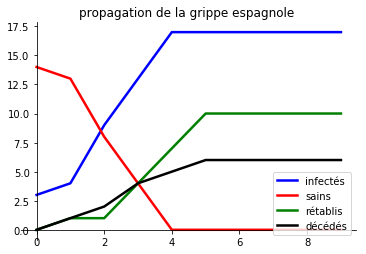

In [40]:
%matplotlib inline

_,_,_,_,_,results,results1,results2,results3 = simulation_deplacement_nb()
n = len(results)
x = [i for i in range(n)]
y = [results[i] for i in range(n)]
y1= [results1[i] for i in range(n)]
y2= [results2[i] for i in range(n)]
y3= [results3[i] for i in range(n)]
print("nombre de personnes infectees a chaque etapes")
print(y)
print("nombre de personnes saines a chaque etapes")
print(y1)
print("nombre de personnes retablies a chaque etapes")
print(y2)
print("nombre de personnes decedees a chaque etapes")
print(y3)


figure()
plot(x, y, color="blue", linewidth=2.5, linestyle="-",  label="infectés")
plot(x,y1 , color="red",  linewidth=2.5, linestyle="-", label="sains")
plot(x,y2 , color="green",  linewidth=2.5, linestyle="-", label="rétablis")
plot(x,y3 , color="black",  linewidth=2.5, linestyle="-", label="décédés")


ax = gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

legend(loc='lower right')

title('propagation de la grippe espagnole ')
#plt.savefig('graphique_propagation de la grippe espagnole.png', dpi=200)

show()

# Variation des paramètres

In [41]:
n=5                                    # cas de base 
p=0.5
p1=0.5
p_infect=1
temps_incubation=2

# Variation de n

In [44]:
n=55
p=0.5
p1=0.5
p_infect=1
temps_incubation=2

nombre de personnes infectees a chaque etapes
[1895, 2095, 2152, 2174, 2211, 2223, 2223, 2223, 2223, 2223]
nombre de personnes saines a chaque etapes
[345, 145, 88, 66, 29, 17, 17, 17, 17, 17]
nombre de personnes retablies a chaque etapes
[0, 942, 1043, 1071, 1082, 1102, 1108, 1108, 1108, 1108]
nombre de personnes decedees a chaque etapes
[1, 954, 1053, 1082, 1093, 1110, 1116, 1116, 1116, 1116]


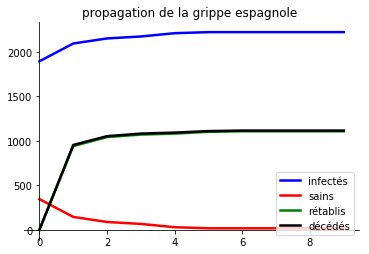

In [45]:
%matplotlib inline

_,_,_,_,_,results,results1,results2,results3 = simulation_deplacement_nb()
n = len(results)
x = [i for i in range(n)]
y = [results[i] for i in range(n)]
y1= [results1[i] for i in range(n)]
y2= [results2[i] for i in range(n)]
y3= [results3[i] for i in range(n)]
print("nombre de personnes infectees a chaque etapes")
print(y)
print("nombre de personnes saines a chaque etapes")
print(y1)
print("nombre de personnes retablies a chaque etapes")
print(y2)
print("nombre de personnes decedees a chaque etapes")
print(y3)


figure()
plot(x, y, color="blue", linewidth=2.5, linestyle="-",  label="infectés")
plot(x,y1 , color="red",  linewidth=2.5, linestyle="-", label="sains")
plot(x,y2 , color="green",  linewidth=2.5, linestyle="-", label="rétablis")
plot(x,y3 , color="black",  linewidth=2.5, linestyle="-", label="décédés")


ax = gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

legend(loc='lower right')

title('propagation de la grippe espagnole ')
show()

# Variation de p_infect  :    la probabilité de mortalité 

# p_infect=0.2

In [46]:
n=5
p=0.5
p1=0.5
p_infect=0.2
temps_incubation=2

nombre de personnes infectees a chaque etapes
[1, 1, 1, 1]
nombre de personnes saines a chaque etapes
[15, 15, 15, 15]
nombre de personnes retablies a chaque etapes
[1, 1, 1, 1]
nombre de personnes decedees a chaque etapes
[0, 0, 0, 0]


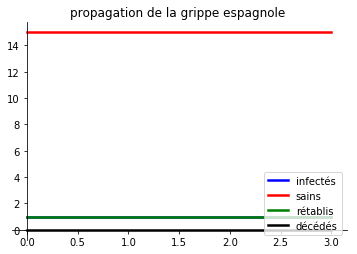

In [47]:
%matplotlib inline

_,_,_,_,_,results,results1,results2,results3 = simulation_deplacement_nb(n-1,1,0,0,0)
n = len(results)
x = [i for i in range(n)]
y = [results[i] for i in range(n)]
y1= [results1[i] for i in range(n)]
y2= [results2[i] for i in range(n)]
y3= [results3[i] for i in range(n)]
print("nombre de personnes infectees a chaque etapes")
print(y)
print("nombre de personnes saines a chaque etapes")
print(y1)
print("nombre de personnes retablies a chaque etapes")
print(y2)
print("nombre de personnes decedees a chaque etapes")
print(y3)


figure()
plot(x, y, color="blue", linewidth=2.5, linestyle="-",  label="infectés")
plot(x,y1 , color="red",  linewidth=2.5,linestyle="-", label="sains")
plot(x,y2 , color="green",  linewidth=2.5, linestyle="-", label="rétablis")
plot(x,y3 , color="black",  linewidth=2.5, linestyle="-", label="décédés")


ax = gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom') 
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

legend(loc='lower right')

title('propagation de la grippe espagnole ')
plt.savefig('graphique_propagation de la grippe espagnole.png', dpi=200)
show()

# Variation de p_infect

# p_infect=0.7

In [48]:
n=5
p=0.5
p1=0.5  # il y a une forte chance que tous les infectés se rtablissent
p_infect=0.7
temps_incubation=2

nombre de personnes infectees a chaque etapes
[11, 13, 15, 15]
nombre de personnes saines a chaque etapes
[4, 2, 0, 0]
nombre de personnes retablies a chaque etapes
[0, 5, 7, 9]
nombre de personnes decedees a chaque etapes
[1, 7, 7, 7]


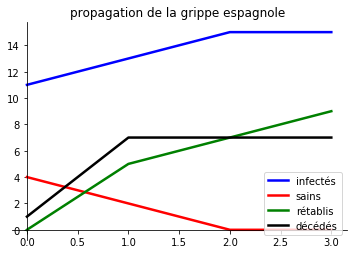

In [49]:
%matplotlib inline

_,_,_,_,_,results,results1,results2,results3 = simulation_deplacement_nb(n-1,0,0,0,0)
n = len(results)
x = [i for i in range(n)]
y = [results[i] for i in range(n)]
y1= [results1[i] for i in range(n)]
y2= [results2[i] for i in range(n)]
y3= [results3[i] for i in range(n)]
print("nombre de personnes infectees a chaque etapes")
print(y)
print("nombre de personnes saines a chaque etapes")
print(y1)
print("nombre de personnes retablies a chaque etapes")
print(y2)
print("nombre de personnes decedees a chaque etapes")
print(y3)


figure()
plot(x, y, color="blue", linewidth=2.5, linestyle="-",  label="infectés")
plot(x,y1 , color="red",  linewidth=2.5, linestyle="-", label="sains")
plot(x,y2 , color="green",  linewidth=2.5, linestyle="-", label="rétablis")
plot(x,y3 , color="black",  linewidth=2.5, linestyle="-", label="décédés")


ax = gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom') 
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

legend(loc='lower right')

title('propagation de la grippe espagnole ')
plt.savefig('graphique_propagation de la grippe espagnole.png', dpi=200)

show()

# Variation de p1 :probabilité de récupération 

# p1=0.1

In [50]:
n=5
p=0.5
p1=0.1  # il y a une forte chance que tous les infectés se rétablisssent
p_infect=1
temps_incubation=2

nombre de personnes infectees a chaque etapes
[12, 15, 15, 15]
nombre de personnes saines a chaque etapes
[3, 0, 0, 0]
nombre de personnes retablies a chaque etapes
[1, 11, 14, 14]
nombre de personnes decedees a chaque etapes
[0, 2, 2, 2]


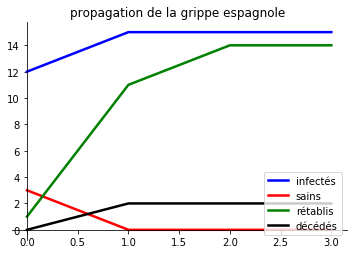

In [51]:
%matplotlib inline

_,_,_,_,_,results,results1,results2,results3 = simulation_deplacement_nb(n-1,0,0,0,0)
n = len(results)
x = [i for i in range(n)]
y = [results[i] for i in range(n)]
y1= [results1[i] for i in range(n)]
y2= [results2[i] for i in range(n)]
y3= [results3[i] for i in range(n)]
print("nombre de personnes infectees a chaque etapes")
print(y)
print("nombre de personnes saines a chaque etapes")
print(y1)
print("nombre de personnes retablies a chaque etapes")
print(y2)
print("nombre de personnes decedees a chaque etapes")
print(y3)


figure()
plot(x, y, color="blue", linewidth=2.5, linestyle="-",  label="infectés")
plot(x,y1 , color="red",  linewidth=2.5, linestyle="-", label="sains")
plot(x,y2 , color="green",  linewidth=2.5, linestyle="-", label="rétablis")
plot(x,y3 , color="black",  linewidth=2.5, linestyle="-", label="décédés")


ax = gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom') 
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

legend(loc='lower right')

title('propagation de la grippe espagnole ')
plt.savefig('graphique_propagation de la grippe espagnole.png', dpi=200)

show()

In [52]:
p1=1

In [53]:
n=5
p=0.5
p1=1  # il y a une forte chance que tous les infectés morent
p_infect=1
temps_incubation=2

nombre de personnes infectees a chaque etapes
[8, 15, 15, 15]
nombre de personnes saines a chaque etapes
[7, 0, 0, 0]
nombre de personnes retablies a chaque etapes
[0, 0, 0, 0]
nombre de personnes decedees a chaque etapes
[1, 9, 16, 16]


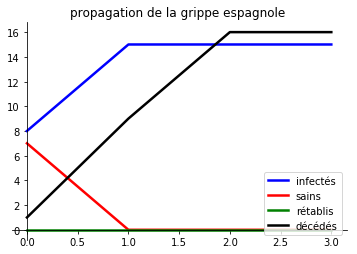

In [54]:
%matplotlib inline

_,_,_,_,_,results,results1,results2,results3 = simulation_deplacement_nb(n-1,0,0,0,0)
n = len(results)
x = [i for i in range(n)]
y = [results[i] for i in range(n)]
y1= [results1[i] for i in range(n)]
y2= [results2[i] for i in range(n)]
y3= [results3[i] for i in range(n)]
print("nombre de personnes infectees a chaque etapes")
print(y)
print("nombre de personnes saines a chaque etapes")
print(y1)
print("nombre de personnes retablies a chaque etapes")
print(y2)
print("nombre de personnes decedees a chaque etapes")
print(y3)


figure()
plot(x, y, color="blue", linewidth=2.5, linestyle="-",  label="infectés")
plot(x,y1 , color="red",  linewidth=2.5, linestyle="-", label="sains")
plot(x,y2 , color="green",  linewidth=2.5, linestyle="-", label="rétablis")
plot(x,y3 , color="black",  linewidth=2.5, linestyle="-", label="décédés")


ax = gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom') 
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

legend(loc='lower right')

title('propagation de la grippe espagnole ')
plt.savefig('graphique_propagation de la grippe espagnole.png', dpi=200)

show()

# Variation de la probabilté p  :probabilité qui permet le déplacement 

# p=0

In [55]:
n=5
p=0 #c 'est une probabilité qui détermine si une personne veut se déplacer p=0 i.e la personne ne se déplace pas 
p1=0.5 
p_infect=1
temps_incubation=2

nombre de personnes infectees a chaque etapes
[14, 15, 15, 15]
nombre de personnes saines a chaque etapes
[1, 0, 0, 0]
nombre de personnes retablies a chaque etapes
[1, 13, 14, 14]
nombre de personnes decedees a chaque etapes
[0, 2, 2, 2]


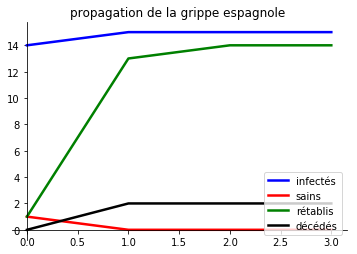

In [56]:
%matplotlib inline

_,_,_,_,_,results,results1,results2,results3 = simulation_deplacement_nb(n-1,0,0,0,0)
n = len(results)
x = [i for i in range(n)]
y = [results[i] for i in range(n)]
y1= [results1[i] for i in range(n)]
y2= [results2[i] for i in range(n)]
y3= [results3[i] for i in range(n)]
print("nombre de personnes infectees a chaque etapes")
print(y)
print("nombre de personnes saines a chaque etapes")
print(y1)
print("nombre de personnes retablies a chaque etapes")
print(y2)
print("nombre de personnes decedees a chaque etapes")
print(y3)


figure()
plot(x, y, color="blue", linewidth=2.5, linestyle="-",  label="infectés")
plot(x,y1 , color="red",  linewidth=2.5, linestyle="-", label="sains")
plot(x,y2 , color="green",  linewidth=2.5, linestyle="-", label="rétablis")
plot(x,y3 , color="black",  linewidth=2.5, linestyle="-", label="décédés")


ax = gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom') 
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

legend(loc='lower right')

title('propagation de la grippe espagnole ')
show()

# Variation du temps d'incubation

# p=0.5

In [57]:
n=5
p=0.5
p1=0.5  #prbabilité de récuperation
p_infect=1 #probabilité de mortalité 
temps_incubation=30  # i.e tous les individus infectes sont en état d'incubation on n'aura pas de personnes rétablies ni décédées

nombre de personnes infectees a chaque etapes
[16, 16, 16, 16]
nombre de personnes saines a chaque etapes
[0, 0, 0, 0]
nombre de personnes retablies a chaque etapes
[0, 0, 0, 0]
nombre de personnes decedees a chaque etapes
[0, 0, 0, 0]


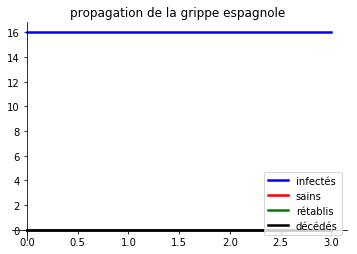

In [58]:
%matplotlib inline

_,_,_,_,_,results,results1,results2,results3 = simulation_deplacement_nb(n-1,0,0,0,0)
n = len(results)
x = [i for i in range(n)]
y = [results[i] for i in range(n)]
y1= [results1[i] for i in range(n)]
y2= [results2[i] for i in range(n)]
y3= [results3[i] for i in range(n)]
print("nombre de personnes infectees a chaque etapes")
print(y)
print("nombre de personnes saines a chaque etapes")
print(y1)
print("nombre de personnes retablies a chaque etapes")
print(y2)
print("nombre de personnes decedees a chaque etapes")
print(y3)


figure()
plot(x, y, color="blue", linewidth=2.5, linestyle="-",  label="infectés")
plot(x,y1 , color="red",  linewidth=2.5, linestyle="-", label="sains")
plot(x,y2 , color="green",  linewidth=2.5, linestyle="-", label="rétablis")
plot(x,y3 , color="black",  linewidth=2.5, linestyle="-", label="décédés")


ax = gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom') 
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

legend(loc='lower right')

title('propagation de la grippe espagnole ')
plt.savefig('graphique_propagation de la grippe espagnole.png', dpi=200)

show()

# Representation graphique du nombre des infectées en fonction des étapes 

In [60]:
n=5     #cas de base
p=0.5
p1=0.5
p_infect=0.5
temps_incubation=2

#####
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[10, 11, 11, 11, 11, 11, 11, 11, 11, 11]


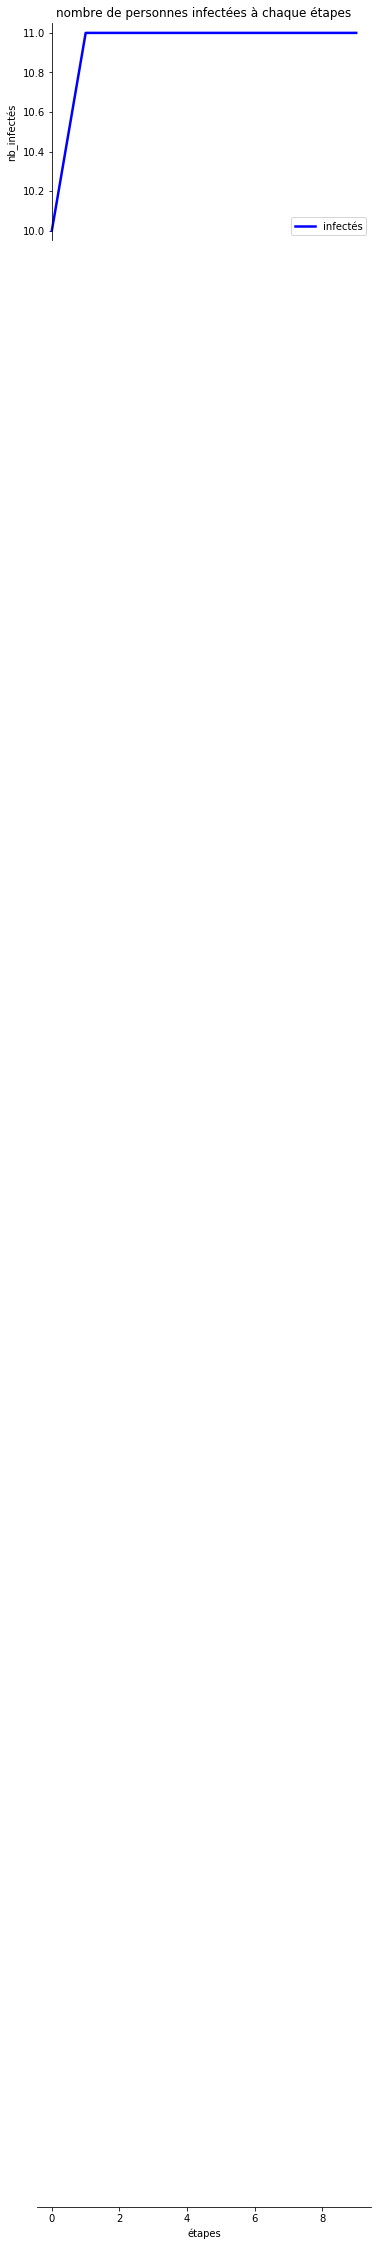

In [61]:
%matplotlib inline

_,_,_,_,_,results,_ ,_,_= simulation_deplacement_nb()
n = len(results)
x = [i for i in range(n)]
y = [results[i] for i in range(n)]
    
print("#####")
print(x)
print(y)

figure()
plot(x, y, color="blue", linewidth=2.5, linestyle="-",  label="infectés")
xlabel('étapes')
ylabel('nb_infectés')
ax = gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

legend(loc='lower right')
title('nombre de personnes infectées à chaque étapes')
plt.savefig('graphique_propagation de la grippe espagnole.png', dpi=200)

show()

# Variation des paraètres

# variation de p_infect 

# p_infect=0.1 #une forte chance que les individus sains ne soient pas infectés

In [62]:
n=15
p=0.5
p1=0.5
p_infect=0.1
temps_incubation=2

#####
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


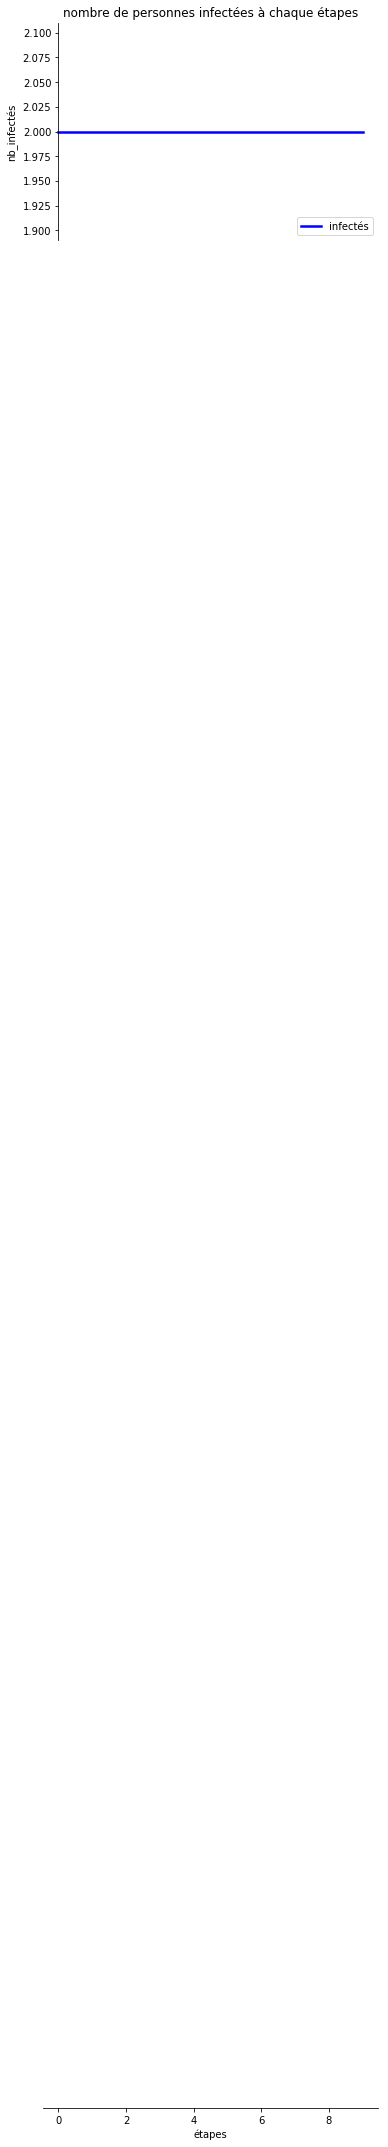

In [63]:
%matplotlib inline

_,_,_,_,_,results,_ ,_,_= simulation_deplacement_nb()
n = len(results)
x = [i for i in range(n)]
y = [results[i] for i in range(n)]
    
print("#####")
print(x)
print(y)

figure()
plot(x, y, color="blue", linewidth=2.5, linestyle="-",  label="infectés")
xlabel('étapes')
ylabel('nb_infectés')
ax = gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

legend(loc='lower right')
title('nombre de personnes infectées à chaque étapes')
plt.savefig('graphique_propagation de la grippe espagnole.png', dpi=200)

show()

# Variation de p_infect   "la probabilité de mortalité est  proche de 1"

In [72]:
n=5
p=0.5
p1=0.5
p_infect=0.7
temps_incubation=2

#####
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[8, 12, 13, 14, 15, 15, 15, 15, 15, 15]


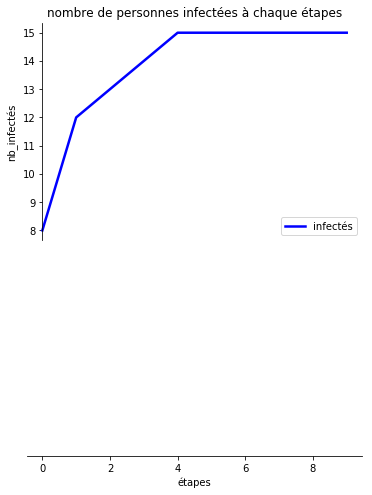

In [73]:
%matplotlib inline

_,_,_,_,_,results,_ ,_,_= simulation_deplacement_nb()
n = len(results)
x = [i for i in range(n)]
y = [results[i] for i in range(n)]
    
print("#####")
print(x)
print(y)

figure()
plot(x, y, color="blue", linewidth=2.5, linestyle="-",  label="infectés")
xlabel('étapes')
ylabel('nb_infectés')
ax = gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

legend(loc='lower right')
title('nombre de personnes infectées à chaque étapes')
plt.savefig('graphique_propagation de la grippe espagnole.png', dpi=200)

show()

# Variation de p_infect    "p_infect   très petit "

In [66]:
n=5
p=0.5
p1=0.5
p_infect=0.1
temps_incubation=2

#####
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


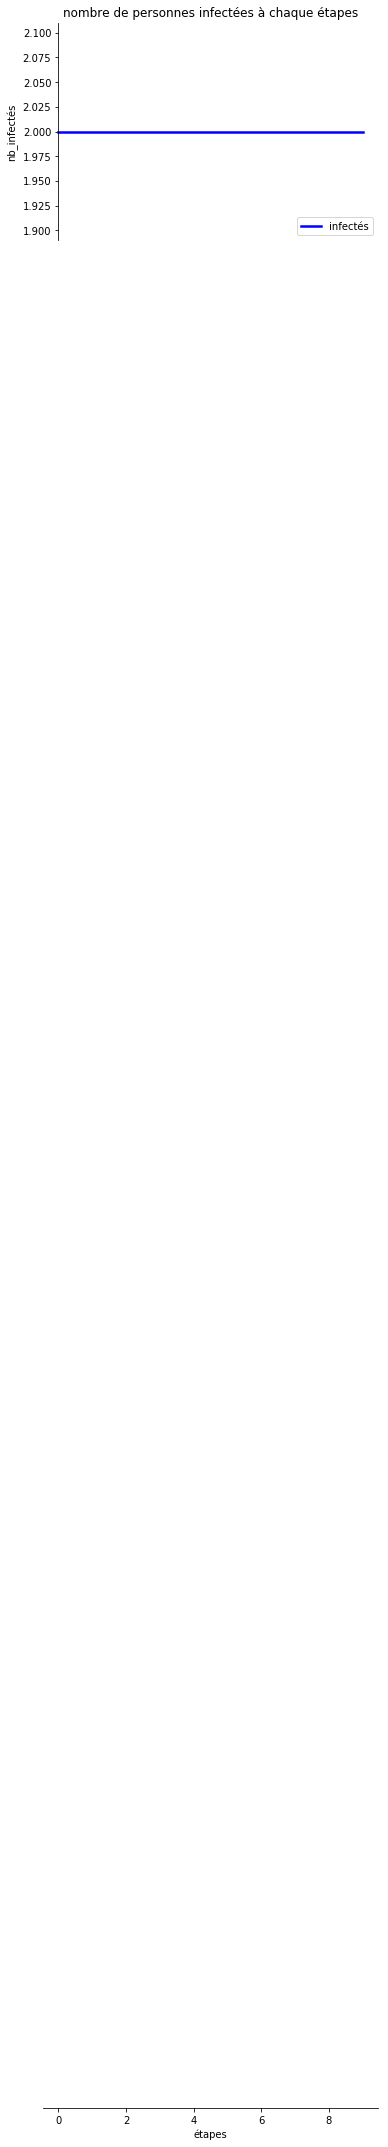

In [67]:
%matplotlib inline

_,_,_,_,_,results,_ ,_,_= simulation_deplacement_nb()
n = len(results)
x = [i for i in range(n)]
y = [results[i] for i in range(n)]
    
print("#####")
print(x)
print(y)

figure()
plot(x, y, color="blue", linewidth=2.5, linestyle="-",  label="infectés")
xlabel('étapes')
ylabel('nb_infectés')
ax = gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

legend(loc='lower right')
title('nombre de personnes infectées à chaque étapes')
show()

# p_infect =0.5 l'individu a une chance sur deux d'etre infecté

In [70]:
n=5
p=0.5
p1=0.5
p_infect=0.5
temps_incubation=2

#####
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[5, 7, 7, 7, 7, 7, 7, 7, 7, 7]


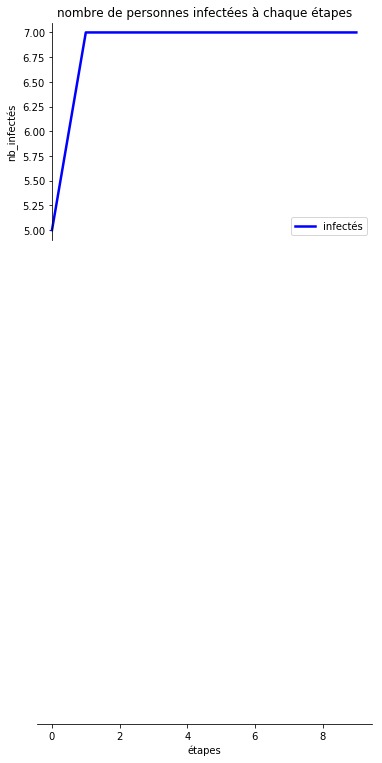

In [71]:
%matplotlib inline

_,_,_,_,_,results,_ ,_,_= simulation_deplacement_nb()
n = len(results)
x = [i for i in range(n)]
y = [results[i] for i in range(n)]
    
print("#####")
print(x)
print(y)

figure()
plot(x, y, color="blue", linewidth=2.5, linestyle="-",  label="infectés")
xlabel('étapes')
ylabel('nb_infectés')
ax = gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

legend(loc='lower right')
title('nombre de personnes infectées à chaque étapes')
show()

# p_infect =0 aucune chance qu'un individu soit infecté a part la premiere personne contagieuse

In [74]:
n=5
p=0.5
p1=0.5
p_infect=0.0
temps_incubation=2


#####
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


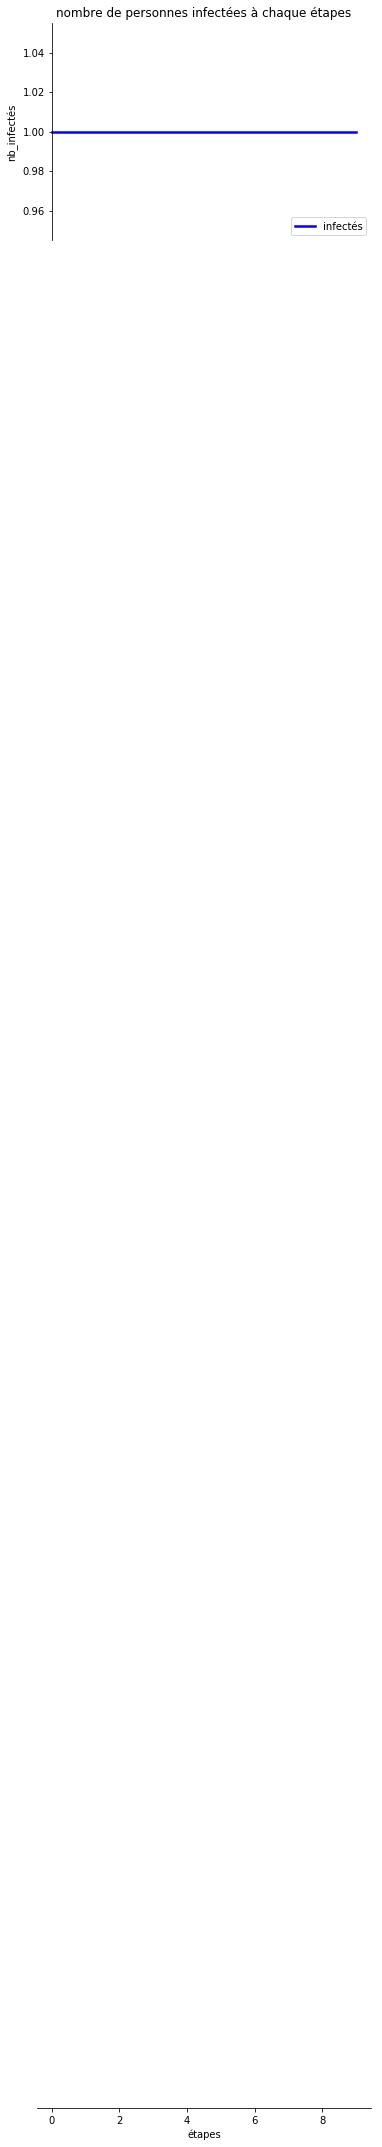

In [75]:
%matplotlib inline

_,_,_,_,_,results,_ ,_,_= simulation_deplacement_nb()
n = len(results)
x = [i for i in range(n)]
y = [results[i] for i in range(n)]
    
print("#####")
print(x)
print(y)

figure()
plot(x, y, color="blue", linewidth=2.5, linestyle="-",  label="infectés")
xlabel('étapes')
ylabel('nb_infectés')
ax = gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

legend(loc='lower right')
title('nombre de personnes infectées à chaque étapes')
show()

# Representation graphique du nombre de personnes saines 

In [82]:
n=5      #cas de base 
p=0.5
p1=0.5
p_infect=0.5
temps_incubation=2

#####
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[14, 14, 14, 14, 14, 14, 14, 14, 14, 14]


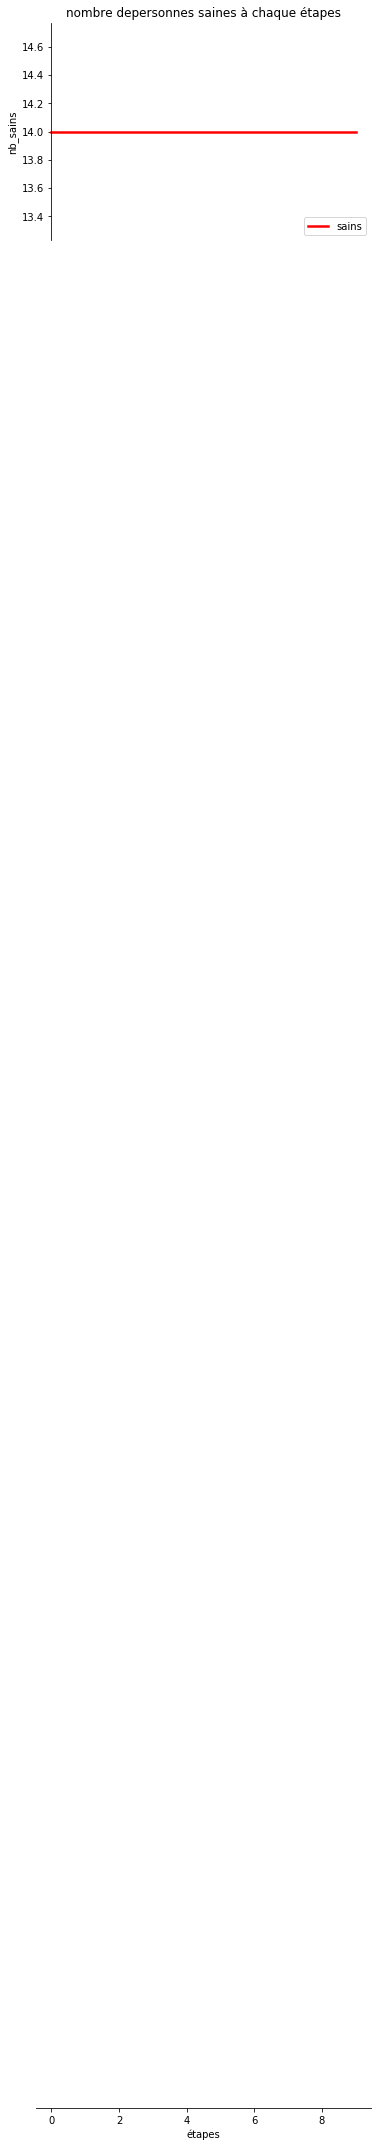

In [83]:
%matplotlib inline

_,_,_,_,_,_,results,_,_= simulation_deplacement_nb()
n = len(results)
x = [i for i in range(n)]
y = [results[i] for i in range(n)]
    
print("#####")
print(x)
print(y)

figure()
plot(x,y , color="red",  linewidth=2.5, linestyle="-", label="sains")
xlabel('étapes')
ylabel('nb_sains')
ax = gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

legend(loc='lower right')
title('nombre depersonnes saines à chaque étapes')
#plt.savefig('graphique_propagation de la grippe espagnole.png', dpi=200)

show()

# Variation des paramètres

# Variation de p_infect et n
# p_infect=0.1

In [88]:
n=5
p=0.5
p1=0.5
p_infect=0.1 #faible chance que la personne soit infectée  c'est à dire le nombre de personnes saines est constant
temps_incubation=2

#####
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[15, 15, 15, 15, 15, 15, 15, 15, 15, 15]


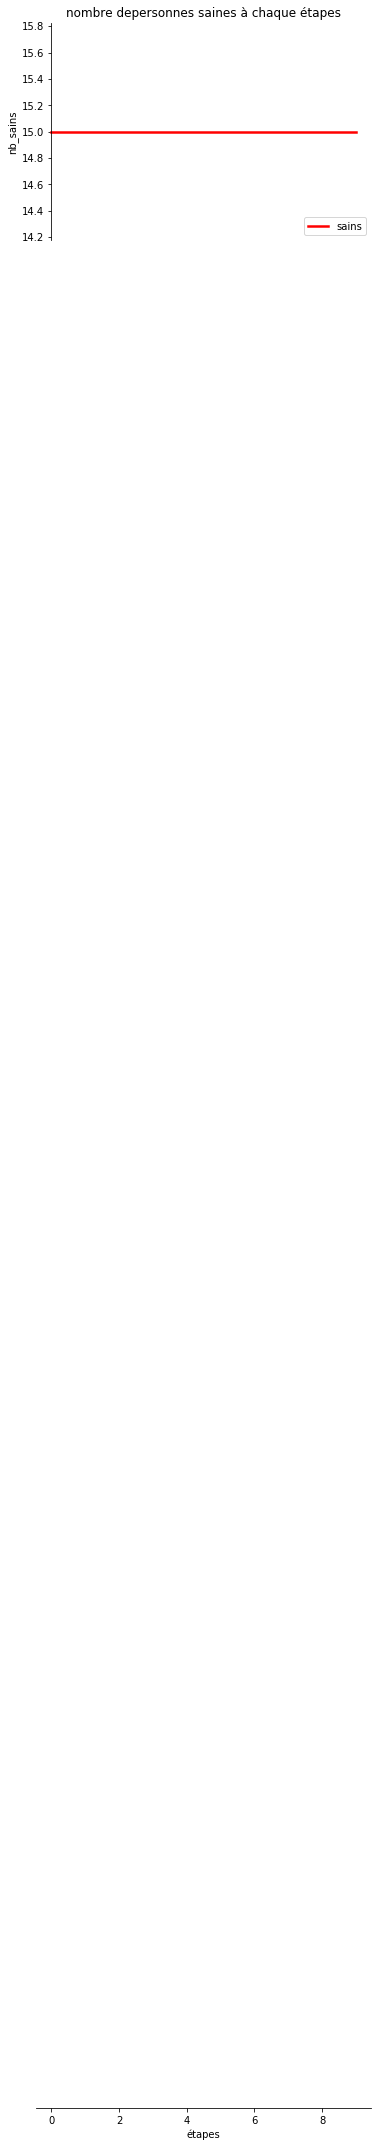

In [87]:
%matplotlib inline

_,_,_,_,_,_,results,_,_= simulation_deplacement_nb()
n = len(results)
x = [i for i in range(n)]
y = [results[i] for i in range(n)]
    
print("#####")
print(x)
print(y)

figure()
plot(x,y , color="red",  linewidth=2.5, linestyle="-", label="sains")
xlabel('étapes')
ylabel('nb_sains')
ax = gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

legend(loc='lower right')
title('nombre depersonnes saines à chaque étapes')
plt.savefig('graphique_propagation de la grippe espagnole.png', dpi=200)

show()

# p_infect=0.7

In [95]:
n=5
p=0.5
p1=0.5
p_infect=0.7
temps_incubation=2

#####
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[9, 5, 4, 2, 2, 2, 2, 2, 2, 2]


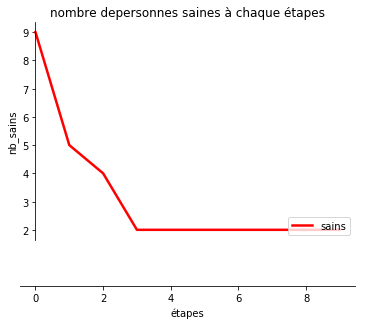

In [96]:
%matplotlib inline

_,_,_,_,_,_,results,_,_= simulation_deplacement_nb()
n = len(results)
x = [i for i in range(n)]
y = [results[i] for i in range(n)]
    
print("#####")
print(x)
print(y)

figure()
plot(x,y , color="red",  linewidth=2.5, linestyle="-", label="sains")
xlabel('étapes')
ylabel('nb_sains')
ax = gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

legend(loc='lower right')
title('nombre depersonnes saines à chaque étapes')
#plt.savefig('graphique_propagation de la grippe espagnole.png', dpi=200)

show()

# Variation de n


In [97]:
n=9
p=0.5
p1=0.5
p_infect=1
temps_incubation=2
M= grille(n)
N=grille_case_vide(n,M)

#####
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[11, 5, 0, 0, 0, 0, 0, 0, 0, 0]


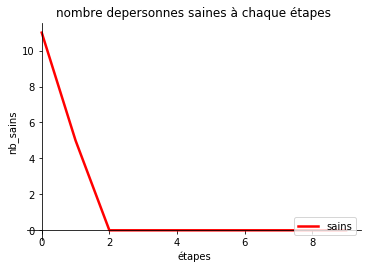

In [98]:
%matplotlib inline

_,_,_,_,_,_,results,_,_= simulation_deplacement_nb()
n = len(results)
x = [i for i in range(n)]
y = [results[i] for i in range(n)]
    
print("#####")
print(x)
print(y)

figure()
plot(x,y , color="red",  linewidth=2.5, linestyle="-", label="sains")
xlabel('étapes')
ylabel('nb_sains')
ax = gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

legend(loc='lower right')
title('nombre depersonnes saines à chaque étapes')
show()

# p_infect=0.3 et n=9

In [101]:
n=9
p=0.5
p1=0.5
p_infect=0.3
temps_incubation=2
M= grille(n)
N=grille_case_vide(n,M)

#####
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[54, 54, 54, 54, 54, 54, 54, 54, 54, 54]


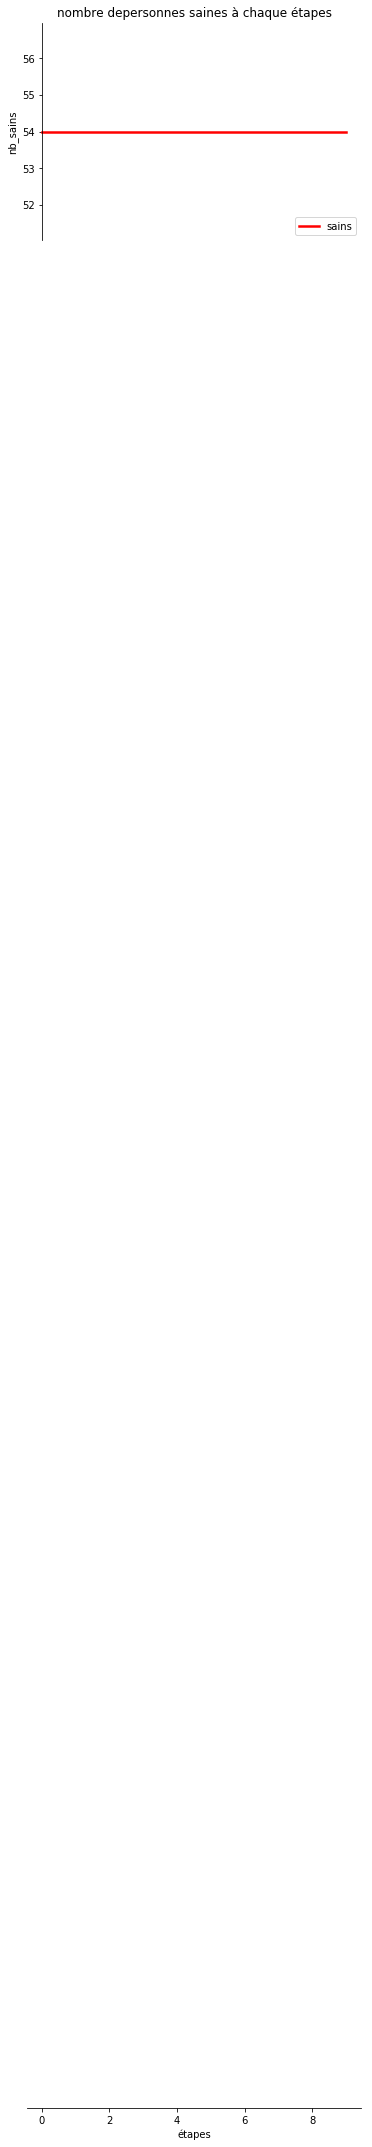

In [100]:
%matplotlib inline

_,_,_,_,_,_,results,_,_= simulation_deplacement_nb()
n = len(results)
x = [i for i in range(n)]
y = [results[i] for i in range(n)]
    
print("#####")
print(x)
print(y)

figure()
plot(x,y , color="red",  linewidth=2.5, linestyle="-", label="sains")
xlabel('étapes')
ylabel('nb_sains')
ax = gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

legend(loc='lower right')
title('nombre depersonnes saines à chaque étapes')
show()

# Variation de p: permet d'effectuer le deplacement

In [102]:
n=9
p=1
p1=0.5
p_infect=1
temps_incubation=2

#####
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[8, 1, 1, 1, 1, 1, 1, 1, 1, 1]


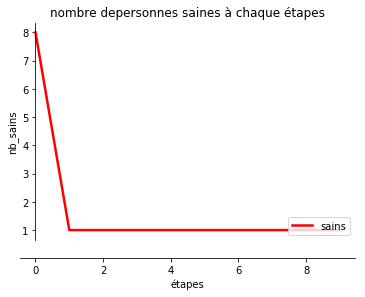

In [103]:
%matplotlib inline

_,_,_,_,_,_,results,_,_= simulation_deplacement_nb()
n = len(results)
x = [i for i in range(n)]
y = [results[i] for i in range(n)]
    
print("#####")
print(x)
print(y)

figure()
plot(x,y , color="red",  linewidth=2.5, linestyle="-", label="sains")
xlabel('étapes')
ylabel('nb_sains')
ax = gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

legend(loc='lower right')
title('nombre depersonnes saines à chaque étapes')
show()

# p=0.1

In [104]:
n=9
p=0.1
p1=0.5
p_infect=1
temps_incubation=2

#####
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[31, 25, 18, 12, 5, 1, 0, 0, 0, 0]


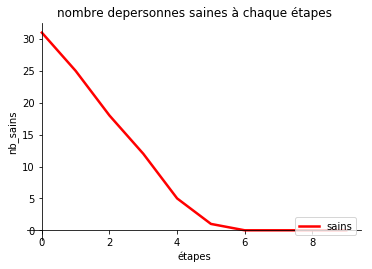

In [105]:
%matplotlib inline

_,_,_,_,_,_,results,_,_= simulation_deplacement_nb()
n = len(results)
x = [i for i in range(n)]
y = [results[i] for i in range(n)]
    
print("#####")
print(x)
print(y)

figure()
plot(x,y , color="red",  linewidth=2.5, linestyle="-", label="sains")
xlabel('étapes')
ylabel('nb_sains')
ax = gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

legend(loc='lower right')
title('nombre depersonnes saines à chaque étapes')
show()

# Representation graphique du nombre de personnes rétablies  

In [109]:
n=5     # taille de la grille
p=0.5 #permet d effectuer le deplacement 
p1=0.5   #probabilite de recuperation 
p_infect=1   # probabilite de mortalite 

#####
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 0, 2, 2, 4, 7, 7, 7, 7, 7]


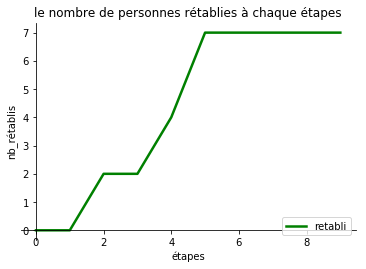

In [110]:
%matplotlib inline

_,_,_,_,_,_,_ ,results,_= simulation_deplacement_nb()
n = len(results)
x = [i for i in range(n)]
y = [results[i] for i in range(n)]
    
print("#####")
print(x)
print(y)

figure()
plot(x,y , color="green",  linewidth=2.5, linestyle="-", label="retabli")
xlabel('étapes')
ylabel('nb_rétablis')
ax = gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

legend(loc='lower right')
title('le nombre de personnes rétablies à chaque étapes')
plt.savefig('graphique_propagation de la grippe espagnole.png', dpi=200)
show()

# Variation des paramètres

# Variation de p1
# p1=1  

In [111]:
n=5
p=0.5
p1=1       #tous les infectés meurent il n'ya aucune chance pour se rétablir 
p_infect=1

temps_incubation=2

#####
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


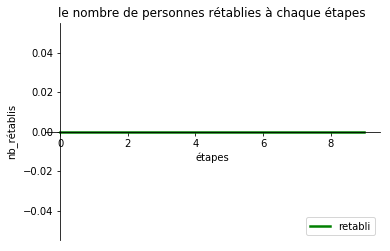

In [112]:
%matplotlib inline

_,_,_,_,_,_,_ ,results,_= simulation_deplacement_nb()
n = len(results)
x = [i for i in range(n)]
y = [results[i] for i in range(n)]
    
print("#####")
print(x)
print(y)

figure()
plot(x,y , color="green",  linewidth=2.5, linestyle="-", label="retabli")
xlabel('étapes')
ylabel('nb_rétablis')
ax = gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

legend(loc='lower right')
title('le nombre de personnes rétablies à chaque étapes')
plt.savefig('graphique_propagation de la grippe espagnole.png', dpi=200)
show()

# p1=0

In [113]:
n=5
p=0.5
p1=-0
p_infect=1
temps_incubation=2

#####
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 15, 16, 16, 16, 16, 16, 16, 16, 16]


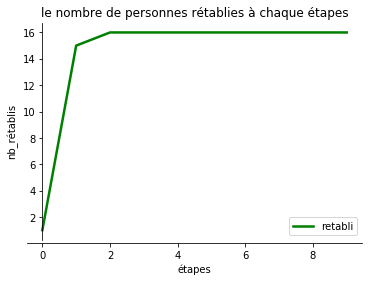

In [114]:
%matplotlib inline

_,_,_,_,_,_,_ ,results,_= simulation_deplacement_nb()
n = len(results)
x = [i for i in range(n)]
y = [results[i] for i in range(n)]
    
print("#####")
print(x)
print(y)

figure()
plot(x,y , color="green",  linewidth=2.5, linestyle="-", label="retabli")
xlabel('étapes')
ylabel('nb_rétablis')
ax = gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

legend(loc='lower right')
title('le nombre de personnes rétablies à chaque étapes')
plt.savefig('graphique_propagation de la grippe espagnole.png', dpi=200)
show()

# Variation de p_infect

In [117]:
n=5
p=0.5
p1=0.5
p_infect=0.4
temps_incubation=2

#####
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 3, 3, 3, 3, 3, 3, 3, 3, 3]


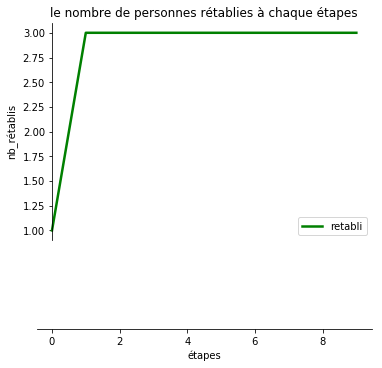

In [118]:
%matplotlib inline

_,_,_,_,_,_,_ ,results,_= simulation_deplacement_nb()
n = len(results)
x = [i for i in range(n)]
y = [results[i] for i in range(n)]
    
print("#####")
print(x)
print(y)

figure()
plot(x,y , color="green",  linewidth=2.5, linestyle="-", label="retabli")
xlabel('étapes')
ylabel('nb_rétablis')
ax = gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

legend(loc='lower right')
title('le nombre de personnes rétablies à chaque étapes')
show()

# p_infect=0.8

In [123]:
n=5
p=0.5
p1=0.5
p_infect=0.8
temps_incubation=2

#####
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 3, 6, 6, 6, 6, 6, 6, 6, 6]


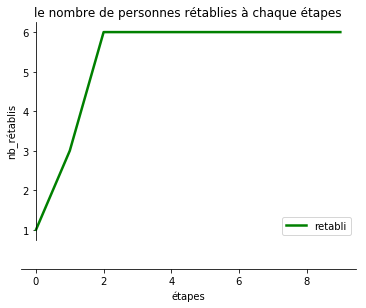

In [124]:
%matplotlib inline

_,_,_,_,_,_,_ ,results,_= simulation_deplacement_nb()
n = len(results)
x = [i for i in range(n)]
y = [results[i] for i in range(n)]
    
print("#####")
print(x)
print(y)

figure()
plot(x,y , color="green",  linewidth=2.5, linestyle="-", label="retabli")
xlabel('étapes')
ylabel('nb_rétablis')
ax = gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

legend(loc='lower right')
title('le nombre de personnes rétablies à chaque étapes')
show()

# Representation graphique du nombre de personnes mortes 

In [130]:
n=5     # taille de la grille
p=0.5 #permet d effectuer le deplacement 
p1=0.5   #probabilite de recuperation 
p_infect=1   # probabilite de mortalite 

#####
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 9, 9, 9, 9, 9, 9, 9, 9, 9]


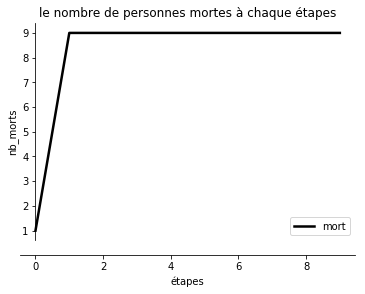

In [131]:
%matplotlib inline

_,_,_,_,_,_,_ ,_,results= simulation_deplacement_nb()
n = len(results)
x = [i for i in range(n)]
y = [results[i] for i in range(n)]
    
print("#####")
print(x)
print(y)

figure()
plot(x,y , color="black",  linewidth=2.5, linestyle="-", label="mort")
xlabel('étapes')
ylabel('nb_morts')
ax = gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

legend(loc='lower right')
title('le nombre de personnes mortes à chaque étapes')
plt.savefig('graphique_propagation de la grippe espagnole.png', dpi=200)
show()

# Variation des paramètres

# Variation de p1

# p1=0.9 #forte chanse que tous les infectés soient morts

In [133]:
n=5
p=0.5
p1=0.9
p_infect=0.8
temps_incubation=2

#####
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 10, 12, 12, 12, 12, 12, 12, 12, 12]


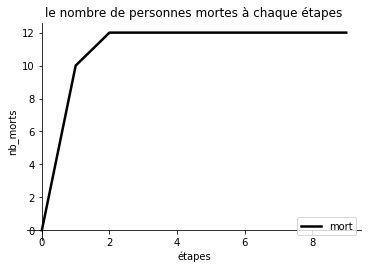

In [134]:
%matplotlib inline

_,_,_,_,_,_,_ ,_,results= simulation_deplacement_nb()
n = len(results)
x = [i for i in range(n)]
y = [results[i] for i in range(n)]
    
print("#####")
print(x)
print(y)

figure()
plot(x,y , color="black",  linewidth=2.5, linestyle="-", label="mort")
xlabel('étapes')
ylabel('nb_morts')
ax = gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

legend(loc='lower right')
title('le nombre de personnes mortes à chaque étapes')
plt.savefig('graphique_propagation de la grippe espagnole.png', dpi=200)
show()

# p1=0.1

In [135]:
n=5
p=0.5
p1=0.1
p_infect=0.8
temps_incubation=2

#####
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 3, 3, 3, 3, 3, 3, 3, 3, 3]


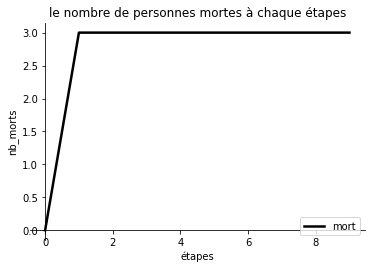

In [136]:
%matplotlib inline

_,_,_,_,_,_,_ ,_,results= simulation_deplacement_nb()
n = len(results)
x = [i for i in range(n)]
y = [results[i] for i in range(n)]
    
print("#####")
print(x)
print(y)

figure()
plot(x,y , color="black",  linewidth=2.5, linestyle="-", label="mort")
xlabel('étapes')
ylabel('nb_morts')
ax = gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

legend(loc='lower right')
title('le nombre de personnes mortes à chaque étapes')
plt.savefig('graphique_propagation de la grippe espagnole.png', dpi=200)

show()